<a href="https://colab.research.google.com/github/Neelavo/Coordinator-Task-1/blob/main/RL_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Neelavo Sen
# CS22B095
# Task 1
# text box better for this but this is runnable :)

In [ ]:
# imports

import numpy  as np
from tqdm import tqdm # Read about these imports and for what purpose these modules are used
import matplotlib.pyplot as plt

In [ ]:
# PyTorch imports

# Read about these imports and for what purpose these modules are used
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

## Creating Dataset

In [ ]:
# First we need to create a Dataset for our Neural Network
# Let's define a function from which we can create a dataset

F = lambda x,y : x**2 + torch.exp(y**2) + y*x
F1 = lambda x,y : torch.exp(x**0.5) + torch.exp(y+5**-0.9) + torch.sin(x*y)
F2 = lambda x,y : torch(1+x**-0.5) + y**2 + torch.cos(x*y)
''' You need to use only 'torch.exp' or 'torch.sin' like that not 'np.exp' or 'np.sin' etc... '''
# Note x,y belongs to [0,1], are tensors no?

" You need to use only 'torch.exp' or 'torch.sin' like that not 'np.exp' or 'np.sin' etc... "

**`try these functions as well `**

* $ F(x,y) = x^{0.5} + (y+5)^{-0.9} + \sin(x*y) $

* $ F(x,y) = (1+x)^{-0.5} + (y)^2 + \cos(x*y) $

$\underline{Note} : x,y \in [0,1]$

In [ ]:
class Sample_Data(Dataset): # read about 'Dataset' in PyTorch : https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

    def __init__(self, fn = F, n = 1000):
        # n = no of samples you want to generate

        self.X = torch.rand((n,1)) # read about random number generators in PyTorch
        self.Y = torch.rand((n,1))
        self.fn=fn
        # Ques 1)
        '''1) Here we need to concatenated the two data to get output as (n,2), what you need to fill in dim ? '''
        #self.out=torch.cat((self.X,self.Y),1)
        self.Z = torch.tensor(list(zip(self.X, self.Y)))


    def __len__(self):
        return len(self.Z)

    def __getitem__(self,index):
        return self.Z[index], torch.tensor(self.fn(self.X[index], self.Y[index]))

    ''' 2) Fill the __getitem__ and __len__ fn'''


In [ ]:
# Ques 3 :
''' create a sample_loader with n = 100 samples, batch_size = 12 '''

training_data = Sample_Data(n=100)
train_dataloader = DataLoader(training_data, batch_size=12, shuffle=True)

for i in iter(train_dataloader):
  print(i)

# type here

[tensor([[0.8342, 0.5091],
        [0.1361, 0.2709],
        [0.2816, 0.2997],
        [0.4488, 0.1043],
        [0.2819, 0.1792],
        [0.0288, 0.2255],
        [0.5550, 0.8307],
        [0.0347, 0.0496],
        [0.8949, 0.0024],
        [0.6879, 0.7406],
        [0.8070, 0.3776],
        [0.7235, 0.4986]]), tensor([[2.4164],
        [1.1315],
        [1.2576],
        [1.2591],
        [1.1626],
        [1.0595],
        [2.7629],
        [1.0054],
        [1.8030],
        [2.7133],
        [2.1093],
        [2.1664]])]
[tensor([[0.8887, 0.9177],
        [0.8333, 0.6961],
        [0.1720, 0.9977],
        [0.7367, 0.8823],
        [0.4059, 0.9415],
        [0.3746, 0.3569],
        [0.9450, 0.8513],
        [0.7800, 0.2029],
        [0.8756, 0.2595],
        [0.7183, 0.9628],
        [0.7585, 0.7185],
        [0.8611, 0.0495]]), tensor([[3.9268],
        [2.8981],
        [2.9070],
        [3.3708],
        [2.9732],
        [1.4099],
        [3.7617],
        [1.8087],
        

<ipython-input-36-835a716147ef>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.Z[index], torch.tensor(self.fn(self.X[index], self.Y[index]))


## creating Model

In [ ]:
class Regression_Model(nn.Module): # read about creating a Neural Network in PyTorch : https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

    def __init__(self, arch = [2,32,64,16,1], activation_fn = nn.ReLU):

        super(Regression_Model, self).__init__()
        self.arch = arch
        self.activation_fn = activation_fn()

        self.linear_stack = nn.Sequential(
            nn.Linear(2, 32),
            activation_fn(),
            nn.Linear(32, 64),
            activation_fn(),
            nn.Linear(64, 16),
            activation_fn(),
            nn.Linear(16, 1)
        )

        # read about nn.ModuleList
        self.layers = nn.ModuleList()
        for i in range( len(self.arch) - 1) : self.layers.append( nn.Linear(self.arch[i], self.arch[i+1]) )

    def forward(self, x):
       logits = self.linear_stack(x)
       return logits

        # Ques 4 :
      #''' Fill the forward function -> Forward fn need to do operation like this '''
      #''' Ror example : If the architecture and the activation fn used is the default value, The forward fn should do '''
      #''' nn.Linear(2,32) -> nn.ReLU() -> nn.Linear(32,64) -> nn.ReLU() -> ... -> nn.Linear(16,1) '''
      #''' In General : There should be the given activation_fn after each hidden layer in the network  '''


## Creating trainer

In [ ]:
class Neural_Network_Trainer():

    def __init__(self, model, train_dataloader, val_dataloader):


        ## Ques 5) write a code to choose device according to the availability of 'GPU' in computer
        if (torch.cuda.is_available()):
          self.device = torch.device('cuda')
        else:
          self.device = torch.device('cpu')

        self.model = model.to(self.device)
        self.val_dataloader = val_dataloader
        self.train_dataloader = train_dataloader

        self.loss = torch.nn.MSELoss()## Ques 6) What loss should we use here ? (check loss fn in PyTorch)
        self.optimizer = torch.optim.Adam(model.parameters(),lr=1e-3) ## Ques 7) Fill the optimizer code , with learning_rate = 1e-3


    def batch_iteration(self, dataloader, model, train = True):

        total_loss = 0

        for index,batch in enumerate(dataloader):

            data,truth = batch
            data = data.to(self.device)
            truth = truth.to(self.device)

            pred =  model(data)

            # Ques 7) Fill all leftover code here
            print(truth.shape)
            print(pred.shape)
            loss = self.loss(pred, truth)# need to fill here

            if train:
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                # If train you need to optimize the weights and back propagate , so fill the code accordingly (Hint : you need to fill 3 lines of code)


            # Ques 8) adding the loss here , Why I am multiplying here the len(data) here and dividing it by len(dataloader) in the return
            total_loss += loss.item()*( len(data) )

        return total_loss/len(dataloader)


    def train_model(self, epochs, print_freq = 10, plot = True ):

        train_loss_list = []
        validation_loss_list = []


        # Ques 9) Create a tqdm loop object , with  iterable = 'range(0,epochs)' and 'desc' of 'train loop'
        # Read about Tqdm, as we can't just see a blank screen while training, it will be helpful for us to see the progress of our Model
        loop_obj = tqdm(iterable = range(0, epochs), desc='Training Loop', total=epochs)

        for e in loop_obj:

            # print_freq parameter is for printing the values like loss etc... after epoch
            train_loss = self.batch_iteration(dataloader = self.train_dataloader, model = self.model, train = True)
            val_loss = self.batch_iteration(dataloader = self.val_dataloader, model = self.model, train = False)

            # appending the loss here
            train_loss_list.append(train_loss)
            validation_loss_list.append(val_loss)

            # updating the loop obj with the current loss
            loop_obj.set_description(f'Train loss : {train_loss:.3f} | val loss : {val_loss:.3f} |', refresh = True )

            # Now we are using the print_freq parameter
            if (e+1) % print_freq == 0:
                print('='*20)
                print(f" Current epoch is : {e+1}")
                print(f" Current Train loss is : {train_loss:.4f} | Avg train Loss : {sum(train_loss_list)/(e+1):.4f}")
                print(f" Current validation loss is : {val_loss:.4f} | Avg validation Loss : {sum(validation_loss_list)/(e+1):.4f}")
                print('='*20)

        if plot :

            plt.figure( figsize = (10,10) )
            plt.plot(train_loss_list, label = 'train loss')
            plt.plot(validation_loss_list, label = 'validation loss')
            plt.legend(loc = 'best')
            plt.show()

        return (train_loss_list,validation_loss_list)

## Training model

In [ ]:
''' Remember ques - 3, now here create : '''
''' create a train_loader with n = 1e4 samples, batch_size = 512 '''
training_data = Sample_Data(fn=F, n=int(1e4))
train_dataloader = DataLoader(training_data, batch_size=512, shuffle=True)


''' create a validation data_loader with n = 1k samples, batch_size = 256 '''
test_data = Sample_Data(fn=F, n=1000)
validation_dataloader = DataLoader(test_data, batch_size=256, shuffle=True)

In [ ]:
# Ques 10)
''' Now here create a model with a architecture [2,32,64,64,32,16,1], activation_fn = nn.ReLU, name it as model_1 '''
model_1 = Regression_Model(arch = [2,32,64,64,32,16,1], activation_fn = nn.ReLU )

# You can get the number of parameters in your model , by using the code below
print(f" Total no of trainable parameters in the model is : {sum([p.numel() for p in model_1.parameters() if p.requires_grad])*1e-3:.3f} K")

 Total no of trainable parameters in the model is : 12.258 K


Try out with these arch and sigmoid ,tanh, ReLU as activation fn

**arch1 = `[2,8,1]` -> try `ReLU` and `TanH`**

**arch2 = `[2,8,4,1]` -> try `ReLU` and `Sigmoid`**

**arch3 = `[2,8,16,8,4,1]` -> try `Sigmoid` and `TanH`**

In [ ]:
Trainer1 = Neural_Network_Trainer(model = model_1 , train_dataloader = train_dataloader, val_dataloader = validation_dataloader )

Training Loop:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-36-835a716147ef>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.Z[index], torch.tensor(self.fn(self.X[index], self.Y[index]))


torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 2380.473 | val loss : 1030.038 |:   1%|          | 1/100 [00:00<00:53,  1.86it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 1777.304 | val loss : 627.093 |:   2%|▏         | 2/100 [00:01<00:55,  1.75it/s]

torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 793.575 | val loss : 140.888 |:   3%|▎         | 3/100 [00:01<00:53,  1.81it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 217.404 | val loss : 94.195 |:   4%|▍         | 4/100 [00:02<00:51,  1.86it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 157.009 | val loss : 62.336 |:   5%|▌         | 5/100 [00:02<00:50,  1.87it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 114.535 | val loss : 45.372 |:   6%|▌         | 6/100 [00:03<00:50,  1.87it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 81.288 | val loss : 31.156 |:   7%|▋         | 7/100 [00:03<00:55,  1.69it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 54.836 | val loss : 20.392 |:   8%|▊         | 8/100 [00:04<00:54,  1.69it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 35.438 | val loss : 13.280 |:   9%|▉         | 9/100 [00:05<00:52,  1.74it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 23.222 | val loss : 8.948 |:  10%|█         | 10/100 [00:05<00:58,  1.54it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 16.119 | val loss : 6.620 |:  11%|█         | 11/100 [00:06<01:01,  1.45it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 12.264 | val loss : 5.292 |:  12%|█▏        | 12/100 [00:07<01:04,  1.36it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 9.968 | val loss : 4.477 |:  13%|█▎        | 13/100 [00:08<00:59,  1.46it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 8.438 | val loss : 3.831 |:  14%|█▍        | 14/100 [00:08<00:55,  1.56it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 7.239 | val loss : 3.306 |:  14%|█▍        | 14/100 [00:09<00:55,  1.56it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])


Train loss : 7.239 | val loss : 3.306 |:  15%|█▌        | 15/100 [00:09<00:52,  1.63it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 6.177 | val loss : 2.728 |:  16%|█▌        | 16/100 [00:09<00:49,  1.69it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 4.888 | val loss : 2.121 |:  17%|█▋        | 17/100 [00:10<00:46,  1.77it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 3.678 | val loss : 1.562 |:  18%|█▊        | 18/100 [00:10<00:48,  1.70it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 2.744 | val loss : 1.187 |:  19%|█▉        | 19/100 [00:11<00:45,  1.76it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 2.073 | val loss : 0.899 |:  20%|██        | 20/100 [00:11<00:45,  1.75it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 1.600 | val loss : 0.701 |:  21%|██        | 21/100 [00:12<00:43,  1.80it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 1.261 | val loss : 0.573 |:  22%|██▏       | 22/100 [00:13<00:42,  1.82it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 1.054 | val loss : 0.481 |:  23%|██▎       | 23/100 [00:13<00:41,  1.85it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.907 | val loss : 0.424 |:  24%|██▍       | 24/100 [00:14<00:41,  1.84it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.807 | val loss : 0.381 |:  25%|██▌       | 25/100 [00:14<00:40,  1.85it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.737 | val loss : 0.351 |:  26%|██▌       | 26/100 [00:15<00:41,  1.80it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.683 | val loss : 0.326 |:  27%|██▋       | 27/100 [00:15<00:39,  1.83it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.641 | val loss : 0.307 |:  28%|██▊       | 28/100 [00:16<00:38,  1.85it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.607 | val loss : 0.290 |:  29%|██▉       | 29/100 [00:16<00:38,  1.83it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.574 | val loss : 0.276 |:  30%|███       | 30/100 [00:17<00:39,  1.75it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.545 | val loss : 0.262 |:  31%|███       | 31/100 [00:18<00:42,  1.62it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.516 | val loss : 0.248 |:  32%|███▏      | 32/100 [00:19<00:46,  1.45it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([2

Train loss : 0.490 | val loss : 0.236 |:  33%|███▎      | 33/100 [00:19<00:48,  1.39it/s]

torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])


Train loss : 0.465 | val loss : 0.226 |:  34%|███▍      | 34/100 [00:20<00:46,  1.41it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.439 | val loss : 0.210 |:  35%|███▌      | 35/100 [00:21<00:42,  1.52it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.413 | val loss : 0.199 |:  36%|███▌      | 36/100 [00:21<00:39,  1.63it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.389 | val loss : 0.187 |:  37%|███▋      | 37/100 [00:22<00:37,  1.68it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.365 | val loss : 0.176 |:  38%|███▊      | 38/100 [00:22<00:36,  1.72it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.344 | val loss : 0.166 |:  39%|███▉      | 39/100 [00:23<00:34,  1.77it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.323 | val loss : 0.158 |:  40%|████      | 40/100 [00:23<00:33,  1.80it/s]

torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.306 | val loss : 0.149 |:  41%|████      | 41/100 [00:24<00:32,  1.82it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.296 | val loss : 0.143 |:  42%|████▏     | 42/100 [00:24<00:33,  1.73it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.274 | val loss : 0.135 |:  43%|████▎     | 43/100 [00:25<00:32,  1.77it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.262 | val loss : 0.130 |:  44%|████▍     | 44/100 [00:25<00:31,  1.80it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.249 | val loss : 0.123 |:  45%|████▌     | 45/100 [00:26<00:30,  1.82it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.237 | val loss : 0.117 |:  46%|████▌     | 46/100 [00:27<00:29,  1.83it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.226 | val loss : 0.113 |:  47%|████▋     | 47/100 [00:27<00:28,  1.84it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.217 | val loss : 0.109 |:  48%|████▊     | 48/100 [00:28<00:28,  1.85it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.210 | val loss : 0.104 |:  49%|████▉     | 49/100 [00:28<00:27,  1.84it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.202 | val loss : 0.101 |:  50%|█████     | 50/100 [00:29<00:27,  1.82it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.195 | val loss : 0.098 |:  51%|█████     | 51/100 [00:29<00:26,  1.83it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.189 | val loss : 0.094 |:  52%|█████▏    | 52/100 [00:30<00:26,  1.81it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.183 | val loss : 0.091 |:  53%|█████▎    | 53/100 [00:31<00:31,  1.50it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.176 | val loss : 0.089 |:  54%|█████▍    | 54/100 [00:32<00:32,  1.40it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.171 | val loss : 0.087 |:  55%|█████▌    | 55/100 [00:32<00:33,  1.35it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.166 | val loss : 0.085 |:  56%|█████▌    | 56/100 [00:33<00:29,  1.47it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.163 | val loss : 0.081 |:  57%|█████▋    | 57/100 [00:33<00:27,  1.58it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.158 | val loss : 0.081 |:  58%|█████▊    | 58/100 [00:34<00:25,  1.66it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.154 | val loss : 0.077 |:  59%|█████▉    | 59/100 [00:35<00:24,  1.71it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.150 | val loss : 0.075 |:  60%|██████    | 60/100 [00:35<00:22,  1.75it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.147 | val loss : 0.074 |:  61%|██████    | 61/100 [00:36<00:21,  1.78it/s]

torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.145 | val loss : 0.072 |:  62%|██████▏   | 62/100 [00:36<00:20,  1.81it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.142 | val loss : 0.070 |:  63%|██████▎   | 63/100 [00:37<00:20,  1.83it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.137 | val loss : 0.070 |:  64%|██████▍   | 64/100 [00:37<00:19,  1.83it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.134 | val loss : 0.068 |:  65%|██████▌   | 65/100 [00:38<00:20,  1.74it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.131 | val loss : 0.066 |:  66%|██████▌   | 66/100 [00:38<00:19,  1.75it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.128 | val loss : 0.065 |:  67%|██████▋   | 67/100 [00:39<00:18,  1.78it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.127 | val loss : 0.064 |:  68%|██████▊   | 68/100 [00:40<00:17,  1.81it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.124 | val loss : 0.063 |:  69%|██████▉   | 69/100 [00:40<00:17,  1.81it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.122 | val loss : 0.062 |:  70%|███████   | 70/100 [00:41<00:16,  1.84it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.121 | val loss : 0.060 |:  71%|███████   | 71/100 [00:41<00:15,  1.83it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.119 | val loss : 0.059 |:  72%|███████▏  | 72/100 [00:42<00:15,  1.84it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.117 | val loss : 0.059 |:  73%|███████▎  | 73/100 [00:42<00:14,  1.83it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.114 | val loss : 0.058 |:  74%|███████▍  | 74/100 [00:43<00:15,  1.64it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.112 | val loss : 0.057 |:  75%|███████▌  | 75/100 [00:44<00:16,  1.49it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.111 | val loss : 0.056 |:  76%|███████▌  | 76/100 [00:45<00:18,  1.33it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.109 | val loss : 0.055 |:  77%|███████▋  | 77/100 [00:45<00:16,  1.40it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.107 | val loss : 0.055 |:  78%|███████▊  | 78/100 [00:46<00:14,  1.52it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.106 | val loss : 0.053 |:  79%|███████▉  | 79/100 [00:46<00:13,  1.61it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.104 | val loss : 0.053 |:  80%|████████  | 80/100 [00:47<00:11,  1.68it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.103 | val loss : 0.052 |:  81%|████████  | 81/100 [00:48<00:11,  1.68it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.101 | val loss : 0.051 |:  82%|████████▏ | 82/100 [00:48<00:10,  1.75it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.099 | val loss : 0.051 |:  83%|████████▎ | 83/100 [00:49<00:09,  1.75it/s]

torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.099 | val loss : 0.050 |:  84%|████████▍ | 84/100 [00:49<00:09,  1.73it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.097 | val loss : 0.050 |:  85%|████████▌ | 85/100 [00:50<00:08,  1.78it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.096 | val loss : 0.049 |:  86%|████████▌ | 86/100 [00:50<00:07,  1.80it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.094 | val loss : 0.048 |:  87%|████████▋ | 87/100 [00:51<00:07,  1.82it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.093 | val loss : 0.047 |:  88%|████████▊ | 88/100 [00:51<00:06,  1.73it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.092 | val loss : 0.046 |:  89%|████████▉ | 89/100 [00:52<00:06,  1.72it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.091 | val loss : 0.046 |:  90%|█████████ | 90/100 [00:53<00:05,  1.75it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.089 | val loss : 0.046 |:  91%|█████████ | 91/100 [00:53<00:05,  1.78it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.089 | val loss : 0.044 |:  92%|█████████▏| 92/100 [00:54<00:04,  1.81it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.087 | val loss : 0.044 |:  93%|█████████▎| 93/100 [00:54<00:03,  1.83it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.086 | val loss : 0.044 |:  94%|█████████▍| 94/100 [00:55<00:03,  1.85it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.085 | val loss : 0.043 |:  95%|█████████▌| 95/100 [00:55<00:02,  1.69it/s]

torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.084 | val loss : 0.042 |:  96%|█████████▌| 96/100 [00:56<00:02,  1.54it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.082 | val loss : 0.042 |:  97%|█████████▋| 97/100 [00:57<00:02,  1.45it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


Train loss : 0.082 | val loss : 0.041 |:  98%|█████████▊| 98/100 [00:58<00:01,  1.42it/s]

torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([5

Train loss : 0.080 | val loss : 0.040 |:  99%|█████████▉| 99/100 [00:58<00:00,  1.52it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([272, 1])
torch.Size([272, 1])
torch.Size([256, 1])
torch.Size([256, 1])


Train loss : 0.080 | val loss : 0.040 |: 100%|██████████| 100/100 [00:59<00:00,  1.68it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([232, 1])
torch.Size([232, 1])


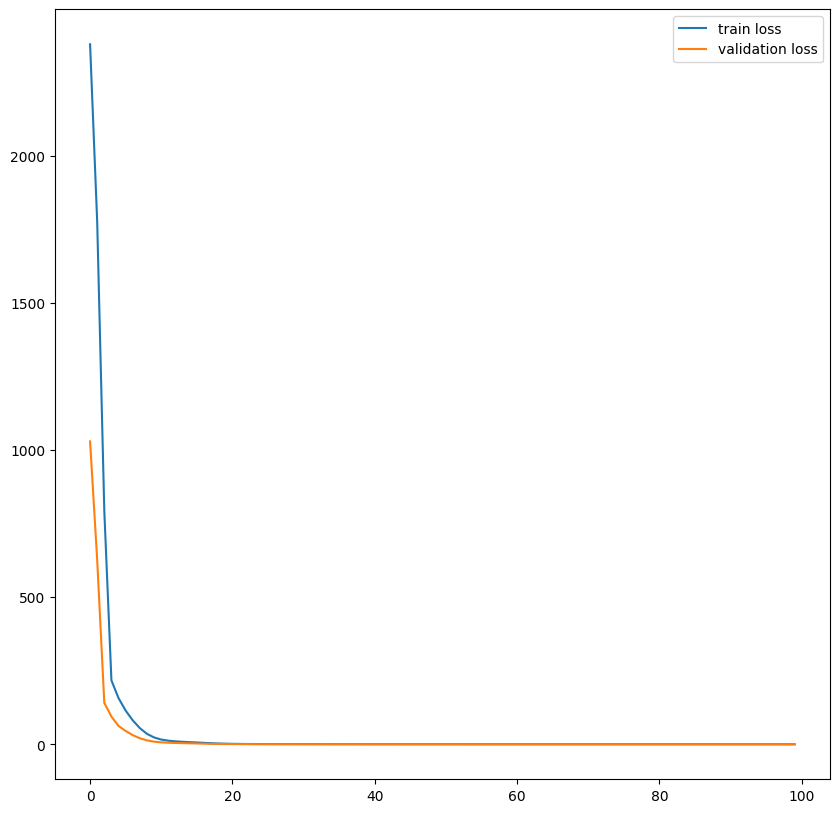

In [ ]:
train_history = Trainer1.train_model(epochs = 100, print_freq = 500, plot = True)

## testing the model

In [ ]:
def test_model(test_dataloader, model):

        device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )
        model = model.to(device)

        X,Y,exact,pred = [],[],[],[]

        for index,batch in enumerate(test_dataloader):

            data,truth = batch[0],batch[1]
            data = data.to(device)
            truth = truth

            # Getting the prediction from the model
            model_prediction =  model.eval()(data)

            # Ques 10)
            for dt, exact_, pred_ in zip(data, truth, model_prediction):
              X.append(dt[0])
              Y.append(dt[1])
              exact.append(exact_)
              pred.append(pred_)
            break
        X = torch.as_tensor(X).detach().numpy()
        Y = torch.as_tensor(Y).detach().numpy()
        pred = torch.as_tensor(pred).detach().numpy()
        exact = torch.as_tensor(exact).detach().numpy()

        plt.title('Predictions vs Actual Values')
        plt.plot(exact, pred)
        plt.show()

            #''' Write a code to : '''
            #''' store the X,Y (data) from and the truth and prediction from the model '''
            #''' Plot '3d scatter plot using the data' and a '2d plot of pred vs exact' '''
            #''' For 3d plot : https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/ '''
        ax = plt.axes(projection='3d')
        ax.scatter(X, Y, pred, label='prediction', color='red')
        ax.scatter(X, Y, exact, label='actual values', color='green')
        ax.legend()
        plt.show()

In [ ]:
test_dataloader = DataLoader( dataset = Sample_Data(n = int(5e2)), shuffle = True, batch_size= 128, drop_last = False )

<ipython-input-36-835a716147ef>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.Z[index], torch.tensor(self.fn(self.X[index], self.Y[index]))


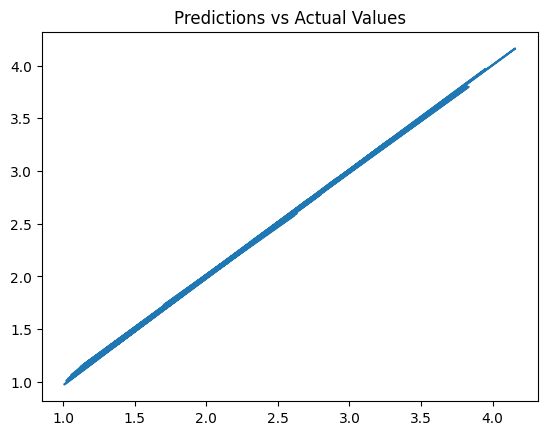

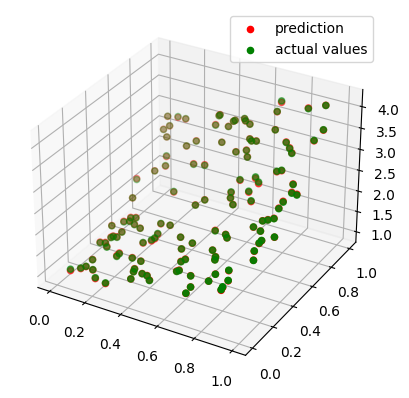

In [ ]:
test_model(test_dataloader = test_dataloader, model = model_1 )